In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as plt
%matplotlib inline
import torchvision.utils as vutils
import glob
import tensorflow as tf

In [2]:
import sys
sys.path.append('../')
import models
import models.mnist
from data import get_loaders
from main import DictWrapper

In [3]:
%load_ext autoreload
%autoreload 1

In [131]:
%aimport log_plotter
from log_plotter import get_run_names, get_data, get_data_pth, plot_smooth, plot_tag, plot_runs_and_tags, get_legend

# MNIST

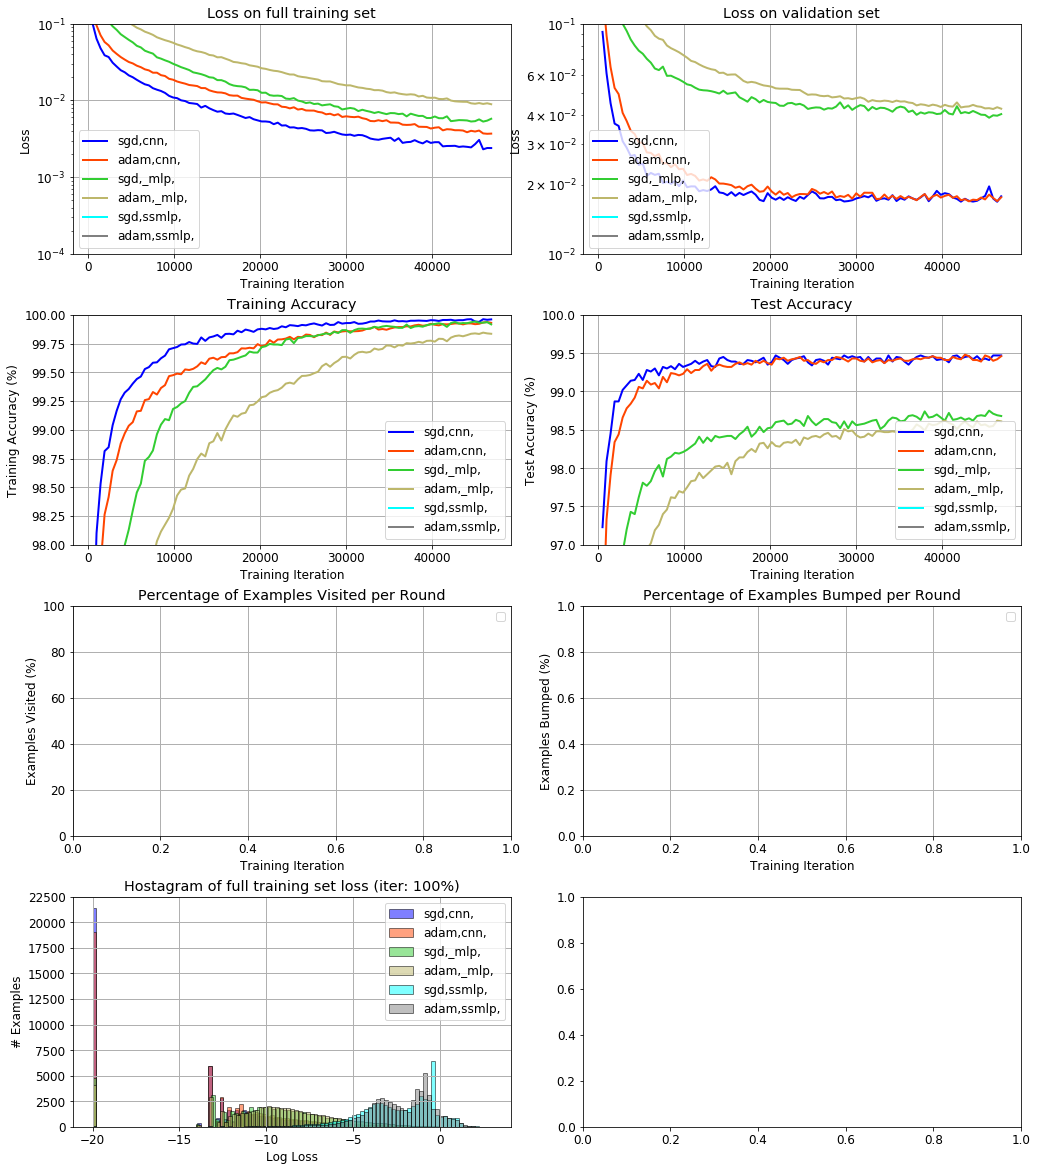

In [8]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_mnist_genlztn/(?!.*scheduler)']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'Tacc', 'Vacc', 'touch_p', 'bumped_p', 'Tloss_h_log_100',] # 'grad_var', 'grad_var_n', 'snoozeC_h']  #  'bumped_p', 'epoch', 'tau', 'alpha_normed_h_log_1', 'alpha_normed_h_log_50', 'alpha_normed_h_log_100'  , 'Tloss_h_log_1', 'Tloss_h_log_50', 'Tloss_h_log_100', 'grad_var', 'grad_var_n']
fig_name = 'figs_gen/mnist.png'
lg_tags = ['sgd', 'adam', 'linrank', 'tau', 'cnn', '_mlp', 'ssmlp']
ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = False
ncolor = None
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor)

In [10]:
run_names

['/u/faghri/dmom/code/runs/runs_mnist_genlztn/00_dataset_mnist,lr_0.02,epochs_100,lr_decay_epoch_100,arch_cnn,optim_sgd,log_stats_,test_batch_size_10',
 '/u/faghri/dmom/code/runs/runs_mnist_genlztn/01_dataset_mnist,lr_0.02,epochs_100,lr_decay_epoch_100,arch_cnn,optim_adam,log_stats_,test_batch_size_10',
 '/u/faghri/dmom/code/runs/runs_mnist_genlztn/02_dataset_mnist,lr_0.02,epochs_100,lr_decay_epoch_100,arch_mlp,optim_sgd,log_stats_,test_batch_size_10',
 '/u/faghri/dmom/code/runs/runs_mnist_genlztn/03_dataset_mnist,lr_0.02,epochs_100,lr_decay_epoch_100,arch_mlp,optim_adam,log_stats_,test_batch_size_10',
 '/u/faghri/dmom/code/runs/runs_mnist_genlztn/04_dataset_mnist,lr_0.02,epochs_100,lr_decay_epoch_100,arch_ssmlp,optim_sgd,log_stats_,test_batch_size_10',
 '/u/faghri/dmom/code/runs/runs_mnist_genlztn/05_dataset_mnist,lr_0.02,epochs_100,lr_decay_epoch_100,arch_ssmlp,optim_adam,log_stats_,test_batch_size_10']

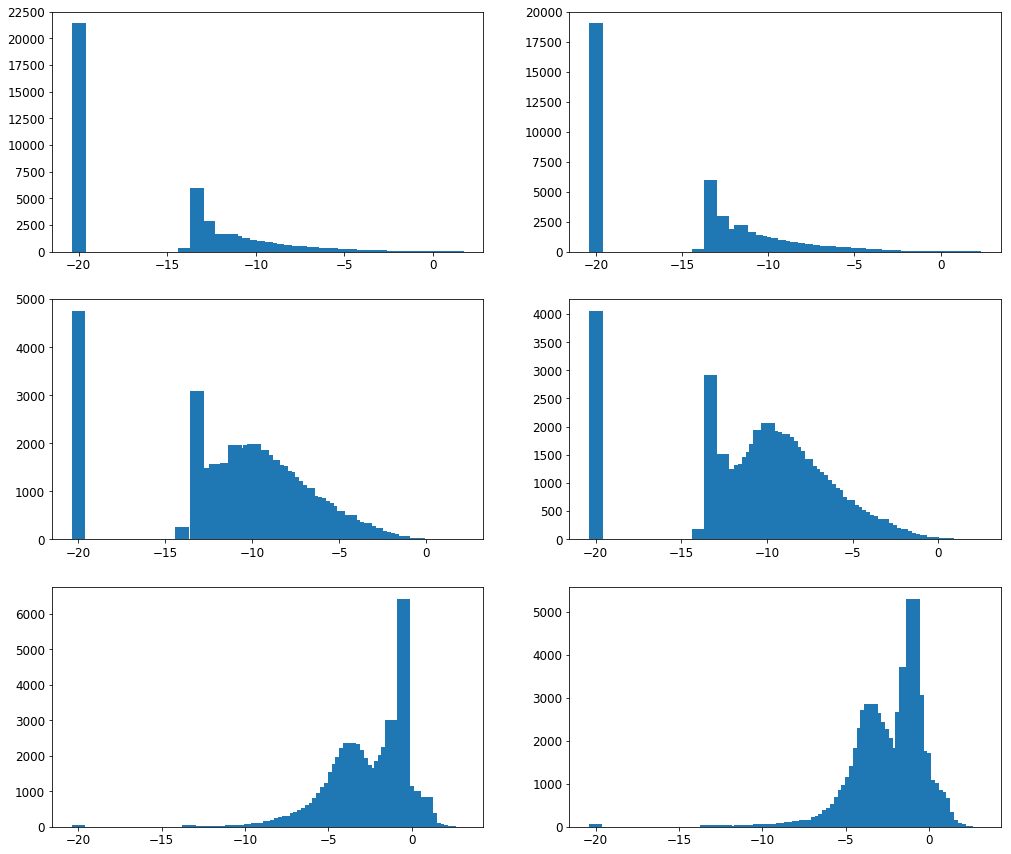

In [108]:
mn = []
mx = []
nz = []
vr = []
mu = []
vr0 = []
mu0 = []
tacc = []
tloss = []
vacc = []
vloss = []
gacc = []
gloss = []
width = 2
height = (len(run_names)+1)//2
fig = plt.figure(figsize=(7*width, 4*height))
fig.subplots()
plt.tight_layout(pad=1., w_pad=3., h_pad=3.0)
# shift = [np.exp(-19), np.exp(-19), 0]
shift = [0, 0, 0]
for i in range(len(run_names)):
    data=torch.load(run_names[i]+'/log.pth.tar')
    val=data['Tloss_f']
    # val = val[val>np.exp(-20)]
    val += shift[i//2]
    val=np.log(np.maximum(np.exp(-20), val))
    mn += [val.min()]
    mx += [val.max()]
    nz += [(val<-19).sum()]
    vr += [val.std()]
    mu += [val.mean()]
    vr0 += [val[val>-20].std()]
    mu0 += [val[val>-20].mean()]
    tacc += [data['Tacc'][-1][-1]]
    vacc += [data['Vacc'][-1][-1]]
    tloss += [data['Tloss'][-1][-1]]
    vloss += [data['Vloss'][-1][-1]]
    gacc += [tacc[-1]-vacc[-1]]
    gloss += [vloss[-1]-tloss[-1]]
    frq, edges = np.histogram(val, bins=100)
    plt.subplot(height, width, i+1)
    plt.bar(edges[:-1], frq)

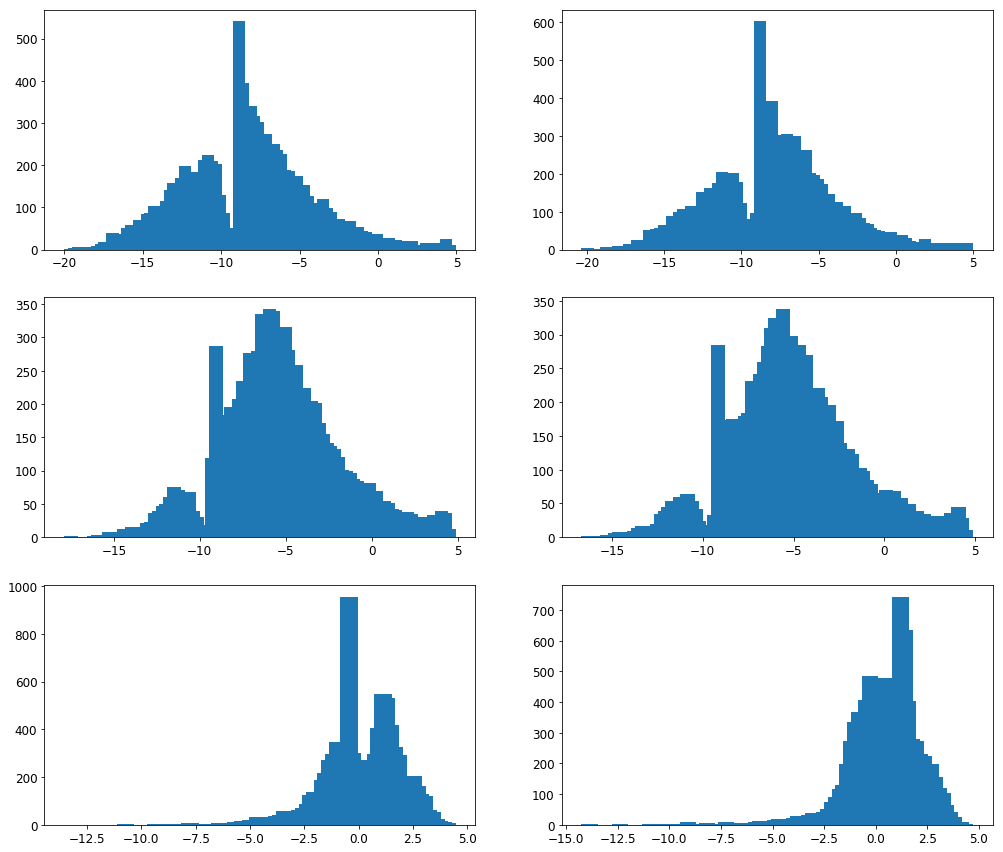

In [111]:
mn = []
mx = []
nz = []
vr = []
mu = []
vr0 = []
mu0 = []
tacc = []
tloss = []
vacc = []
vloss = []
gacc = []
gloss = []
width = 2
height = (len(run_names)+1)//2
fig = plt.figure(figsize=(7*width, 4*height))
fig.subplots()
plt.tight_layout(pad=1., w_pad=3., h_pad=3.0)
for i in range(len(run_names)):
    data=torch.load(run_names[i]+'/log.pth.tar')
    val=data['Vnormg_f']
    val=np.log(np.maximum(np.exp(-20), val))
    mn += [val.min()]
    mx += [val.max()]
    nz += [(val<-19).sum()]
    vr += [val.std()]
    mu += [val.mean()]
    vr0 += [val[val>-20].std()]
    mu0 += [val[val>-20].mean()]
    tacc += [data['Tacc'][-1][-1]]
    vacc += [data['Vacc'][-1][-1]]
    tloss += [data['Tloss'][-1][-1]]
    vloss += [data['Vloss'][-1][-1]]
    gacc += [tacc[-1]-vacc[-1]]
    gloss += [vloss[-1]-tloss[-1]]
    frq, edges = np.histogram(val, bins=100)
    plt.subplot(height, width, i+1)
    plt.bar(edges[:-1], frq)

In [87]:
run_names

['/u/faghri/dmom/code/runs/runs_mnist_genlztn/00_dataset_mnist,lr_0.02,epochs_100,lr_decay_epoch_100,arch_cnn,optim_sgd,log_stats_,test_batch_size_10',
 '/u/faghri/dmom/code/runs/runs_mnist_genlztn/01_dataset_mnist,lr_0.02,epochs_100,lr_decay_epoch_100,arch_cnn,optim_adam,log_stats_,test_batch_size_10',
 '/u/faghri/dmom/code/runs/runs_mnist_genlztn/02_dataset_mnist,lr_0.02,epochs_100,lr_decay_epoch_100,arch_mlp,optim_sgd,log_stats_,test_batch_size_10',
 '/u/faghri/dmom/code/runs/runs_mnist_genlztn/03_dataset_mnist,lr_0.02,epochs_100,lr_decay_epoch_100,arch_mlp,optim_adam,log_stats_,test_batch_size_10',
 '/u/faghri/dmom/code/runs/runs_mnist_genlztn/04_dataset_mnist,lr_0.02,epochs_100,lr_decay_epoch_100,arch_ssmlp,optim_sgd,log_stats_,test_batch_size_10',
 '/u/faghri/dmom/code/runs/runs_mnist_genlztn/05_dataset_mnist,lr_0.02,epochs_100,lr_decay_epoch_100,arch_ssmlp,optim_adam,log_stats_,test_batch_size_10']

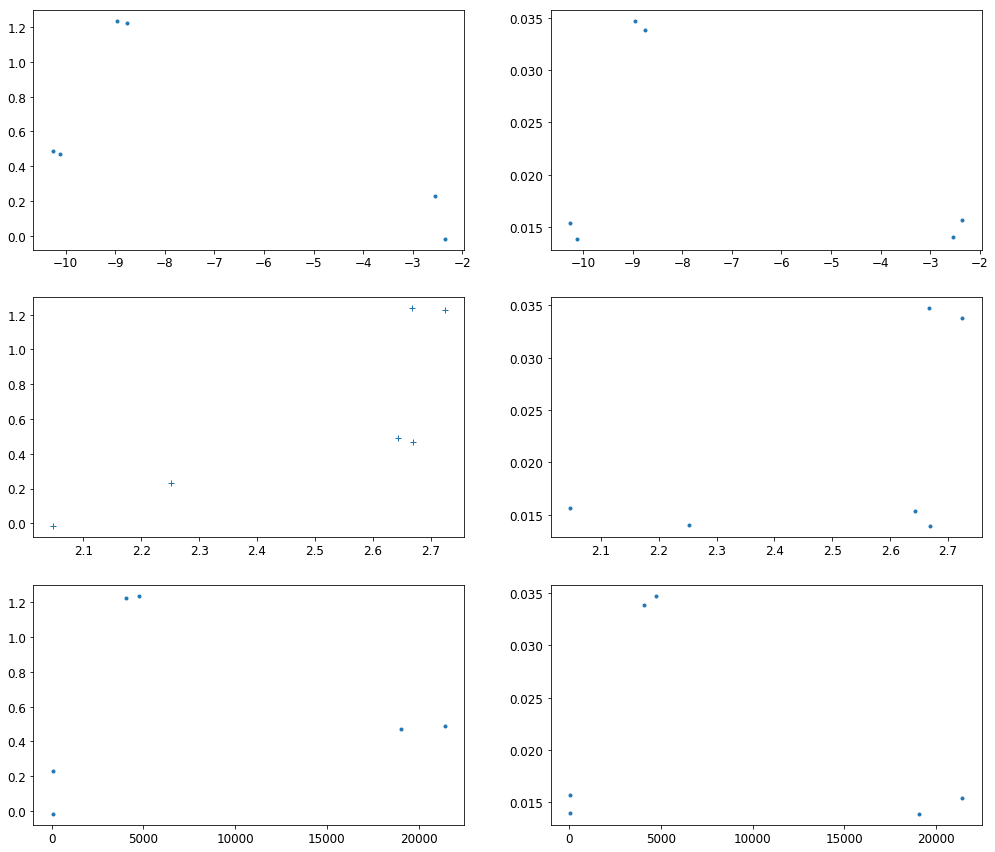

In [85]:
width = 2
height = 3
fig = plt.figure(figsize=(7*width, 4*height))
fig.subplots()
plt.tight_layout(pad=1., w_pad=3., h_pad=3.0)
plt.subplot(height, width, 1)
plt.plot(mu0, gacc, '.')
plt.subplot(height, width, 2)
plt.plot(mu0, gloss, '.')
plt.subplot(height, width, 3)
plt.plot(vr0, gacc, '+')
plt.subplot(height, width, 4)
plt.plot(vr0, gloss, '.')
plt.subplot(height, width, 5)
plt.plot(nz, gacc, '.')
plt.subplot(height, width, 6)
plt.plot(nz, gloss, '.')

In [90]:
vr0

[2.6432339794903097,
 2.6687016850960057,
 2.6674672407385898,
 2.7243859884832853,
 2.2515851146743717,
 2.047022937364473]

In [91]:
gacc

[0.4899999999999949,
 0.4700000000000131,
 1.2366666666666646,
 1.2249999999999943,
 0.23000000000000398,
 -0.01666666666666572]

there might be correlation between variance and accuracy generalization gap

## random labels

# dropout

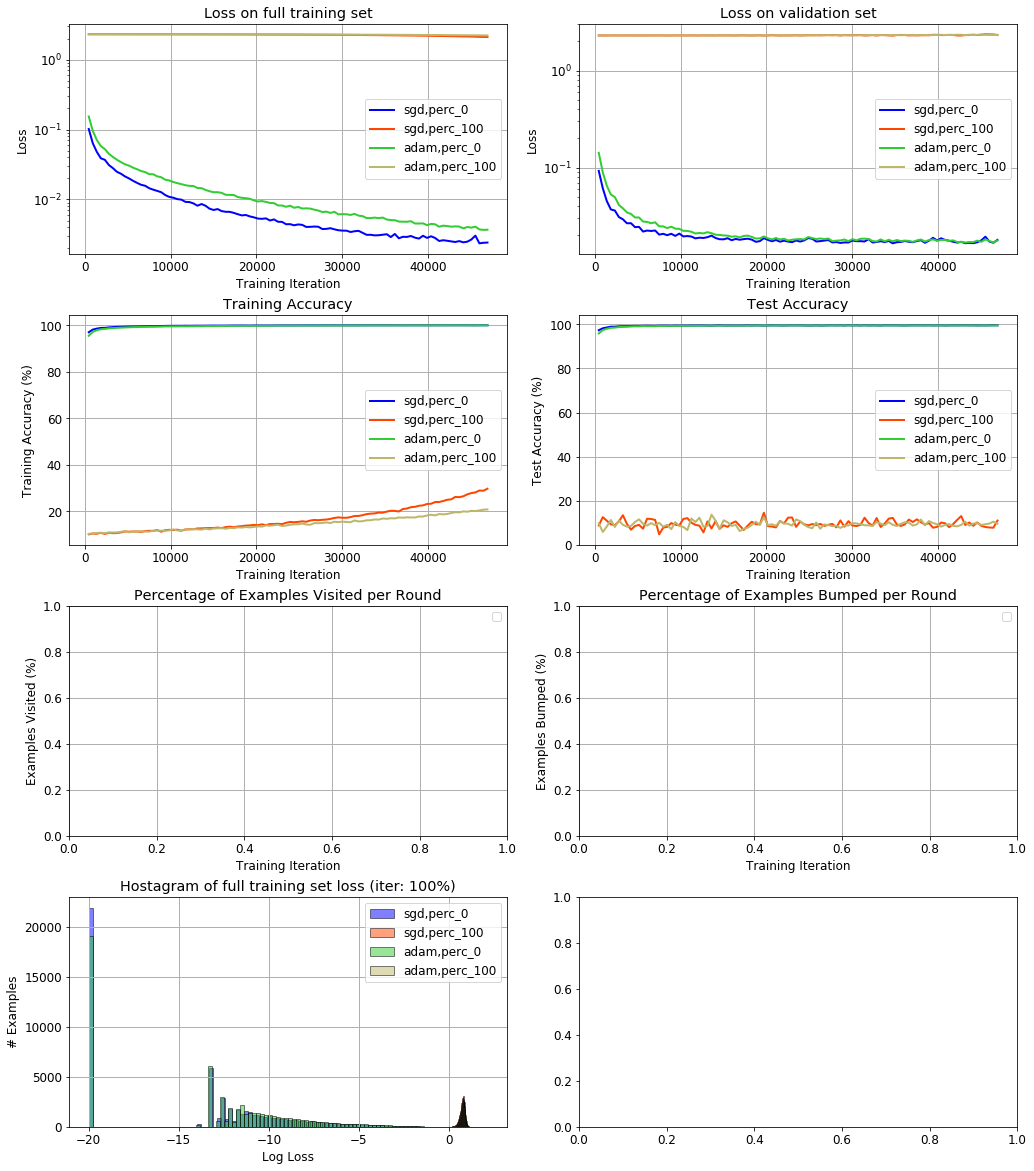

In [138]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_mnist_genlztn/.*corrupt_perc_(0|100)(?!.*nodropout)']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'Tacc', 'Vacc', 'touch_p', 'bumped_p', 'Tloss_h_log_100',] # 'grad_var', 'grad_var_n', 'snoozeC_h']  #  'bumped_p', 'epoch', 'tau', 'alpha_normed_h_log_1', 'alpha_normed_h_log_50', 'alpha_normed_h_log_100'  , 'Tloss_h_log_1', 'Tloss_h_log_50', 'Tloss_h_log_100', 'grad_var', 'grad_var_n']
fig_name = 'figs_gen/mnist_corrupt.png'
lg_tags = ['sgd', 'adam', 'linrank', 'tau', '_mlp', 'ssmlp', 'perc_']
ylim = [None]*20
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = False
ncolor = None
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor)

# nodropout

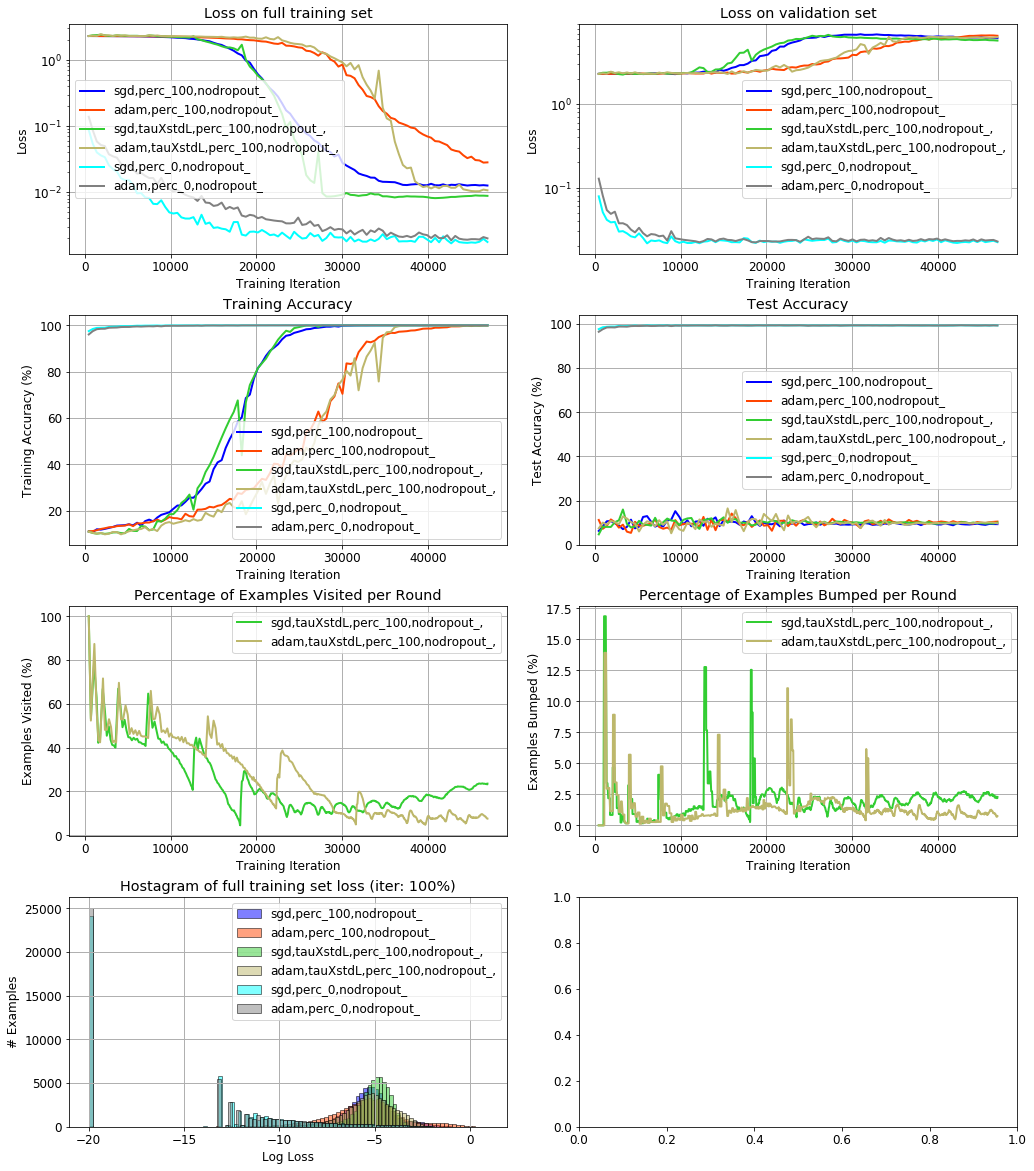

In [137]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_mnist_genlztn/.*corrupt_perc_(0|100)']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'Tacc', 'Vacc', 'touch_p', 'bumped_p', 'Tloss_h_log_100',] # 'grad_var', 'grad_var_n', 'snoozeC_h']  #  'bumped_p', 'epoch', 'tau', 'alpha_normed_h_log_1', 'alpha_normed_h_log_50', 'alpha_normed_h_log_100'  , 'Tloss_h_log_1', 'Tloss_h_log_50', 'Tloss_h_log_100', 'grad_var', 'grad_var_n']
fig_name = 'figs_gen/mnist_corrupt.png'
lg_tags = ['sgd', 'adam', 'linrank', 'tau', '_mlp', 'ssmlp', 'perc_', 'nodropout']
ylim = [None]*20
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = False
ncolor = None
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor)

# label smoothing

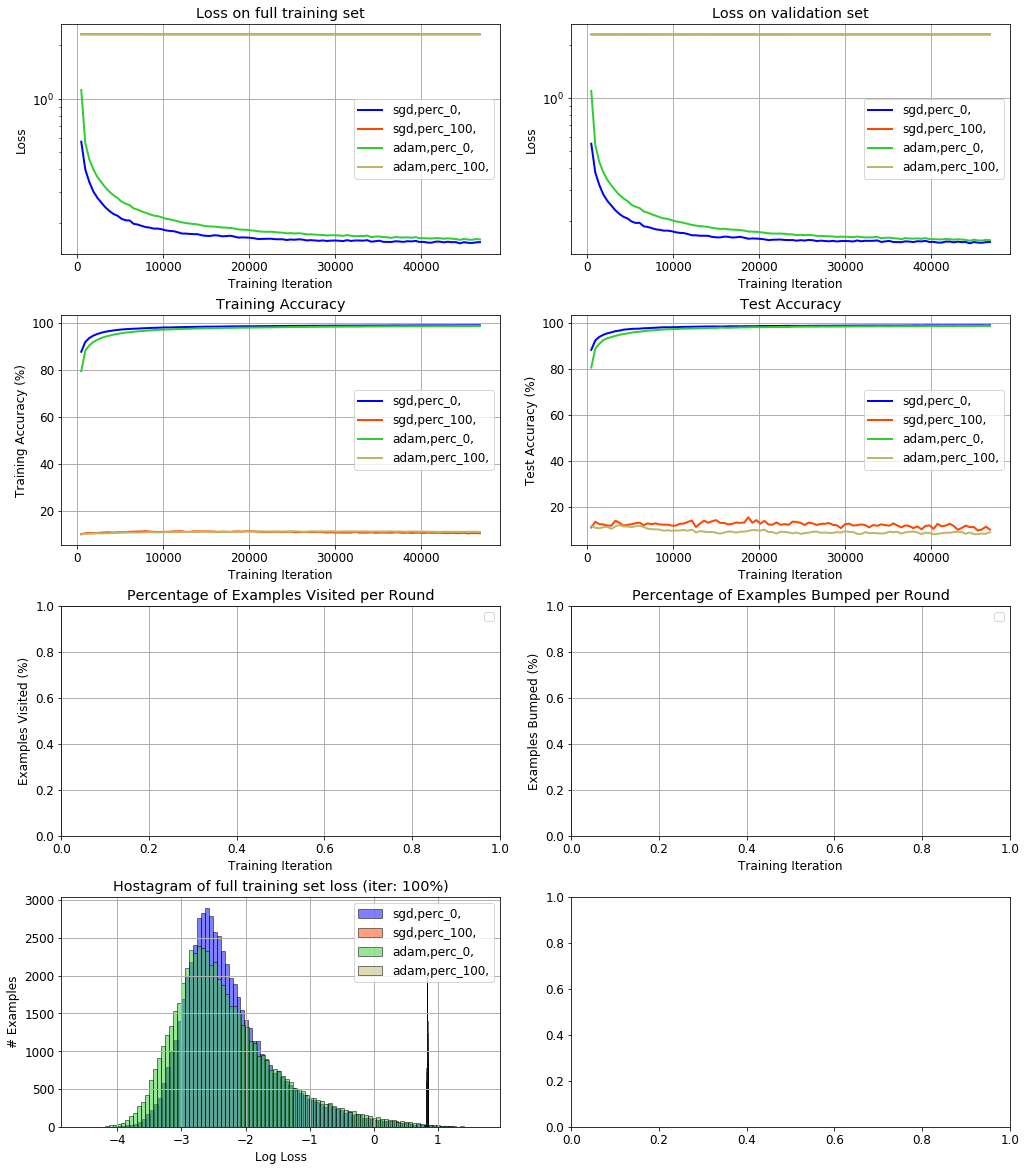

In [143]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_mnist_genlztn/.*label_smoothing_0.1']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'Tacc', 'Vacc', 'touch_p', 'bumped_p', 'Tloss_h_log_100',] # 'grad_var', 'grad_var_n', 'snoozeC_h']  #  'bumped_p', 'epoch', 'tau', 'alpha_normed_h_log_1', 'alpha_normed_h_log_50', 'alpha_normed_h_log_100'  , 'Tloss_h_log_1', 'Tloss_h_log_50', 'Tloss_h_log_100', 'grad_var', 'grad_var_n']
fig_name = 'figs_gen/mnist_corrupt.png'
lg_tags = ['sgd', 'adam', 'linrank', 'tau', '_mlp', 'ssmlp', 'perc_']
ylim = [None]*20
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = False
ncolor = None
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor)

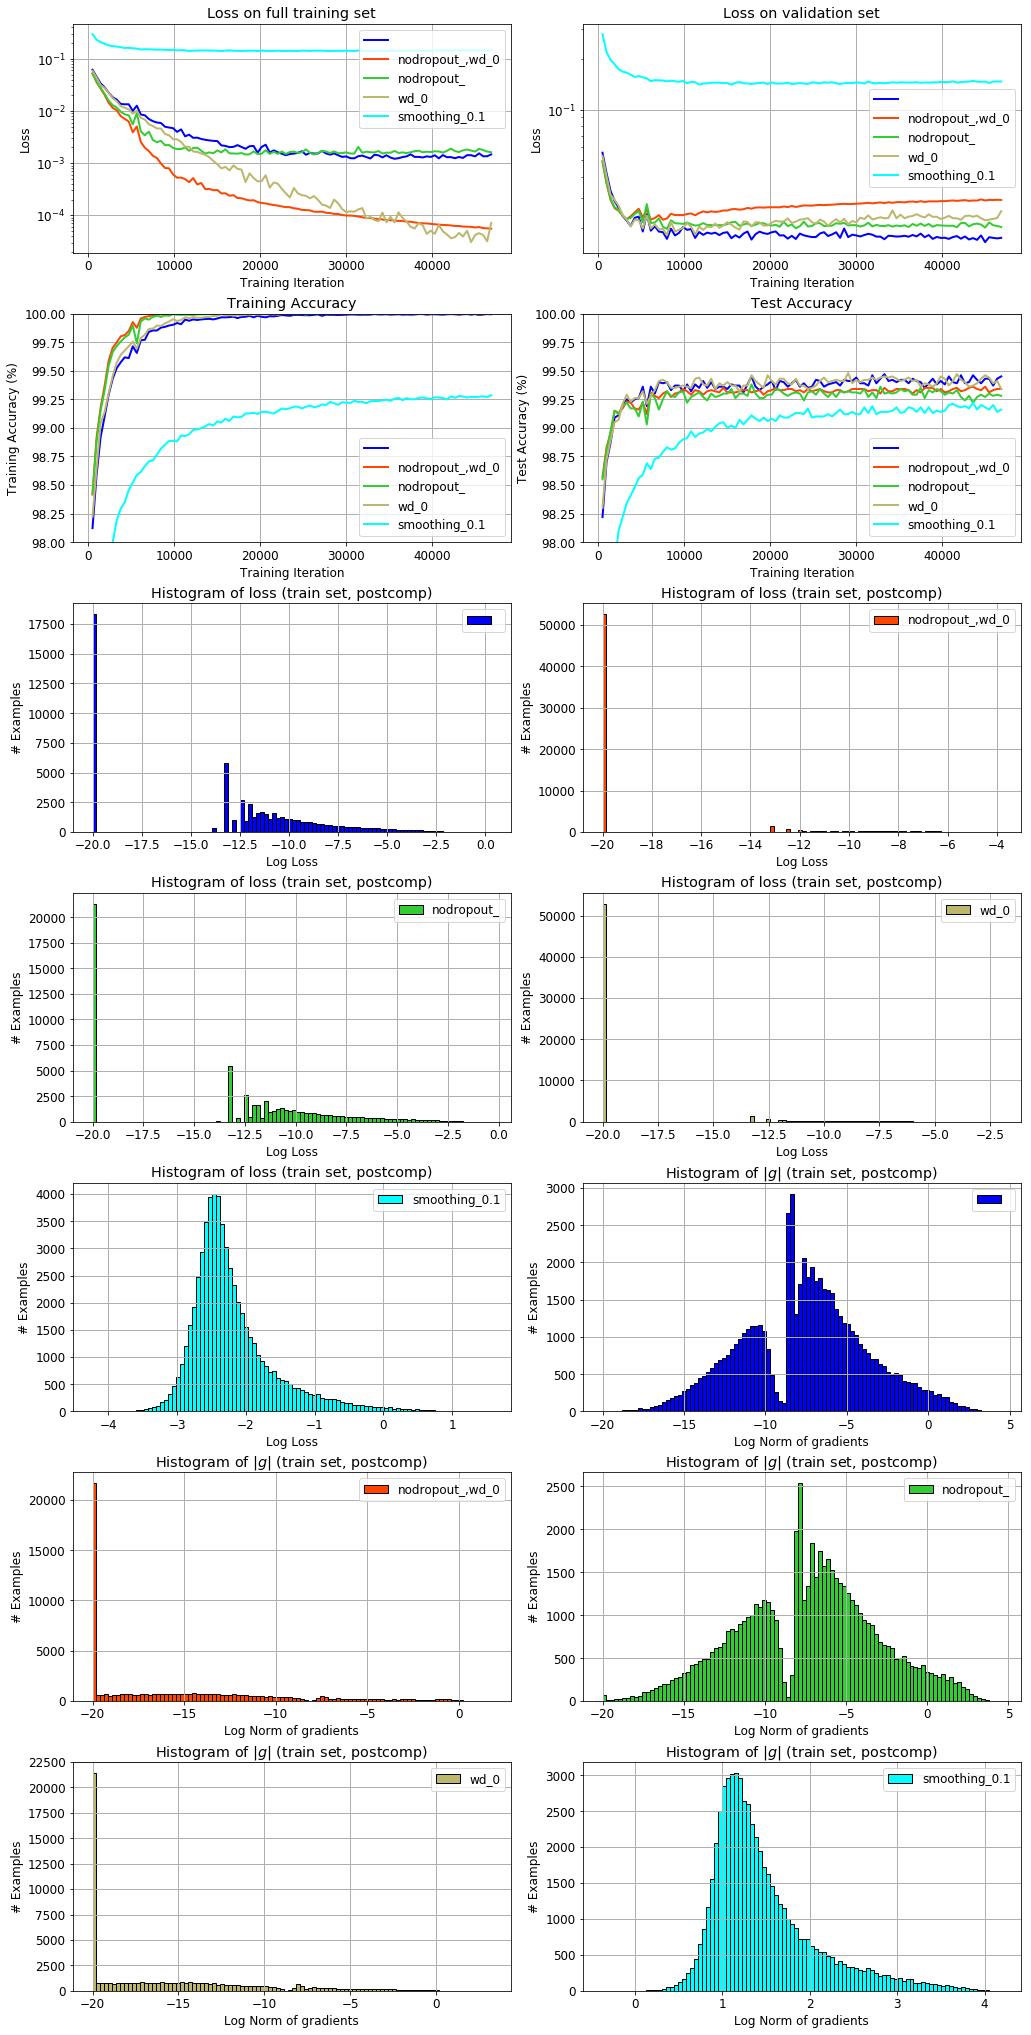

In [174]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_mnist_genbig/.*perc_0']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'Tacc', 'Vacc', 'Tloss_f_log', 'Tnormg_f_log'] # 'Vloss_f', 'Tnormg_f', 'Vnormg_f'] # 'grad_var', 'grad_var_n', 'snoozeC_h']  #  'bumped_p', 'epoch', 'tau', 'alpha_normed_h_log_1', 'alpha_normed_h_log_50', 'alpha_normed_h_log_100'  , 'Tloss_h_log_1', 'Tloss_h_log_50', 'Tloss_h_log_100', 'grad_var', 'grad_var_n']
fig_name = 'figs_gen/mnist_clean.png'
lg_tags = ['nodropout', 'wd', 'smoothing']
ylim = [None]*20
ylim[2:4] = [[98, 100], [98, 100]]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = None
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor)

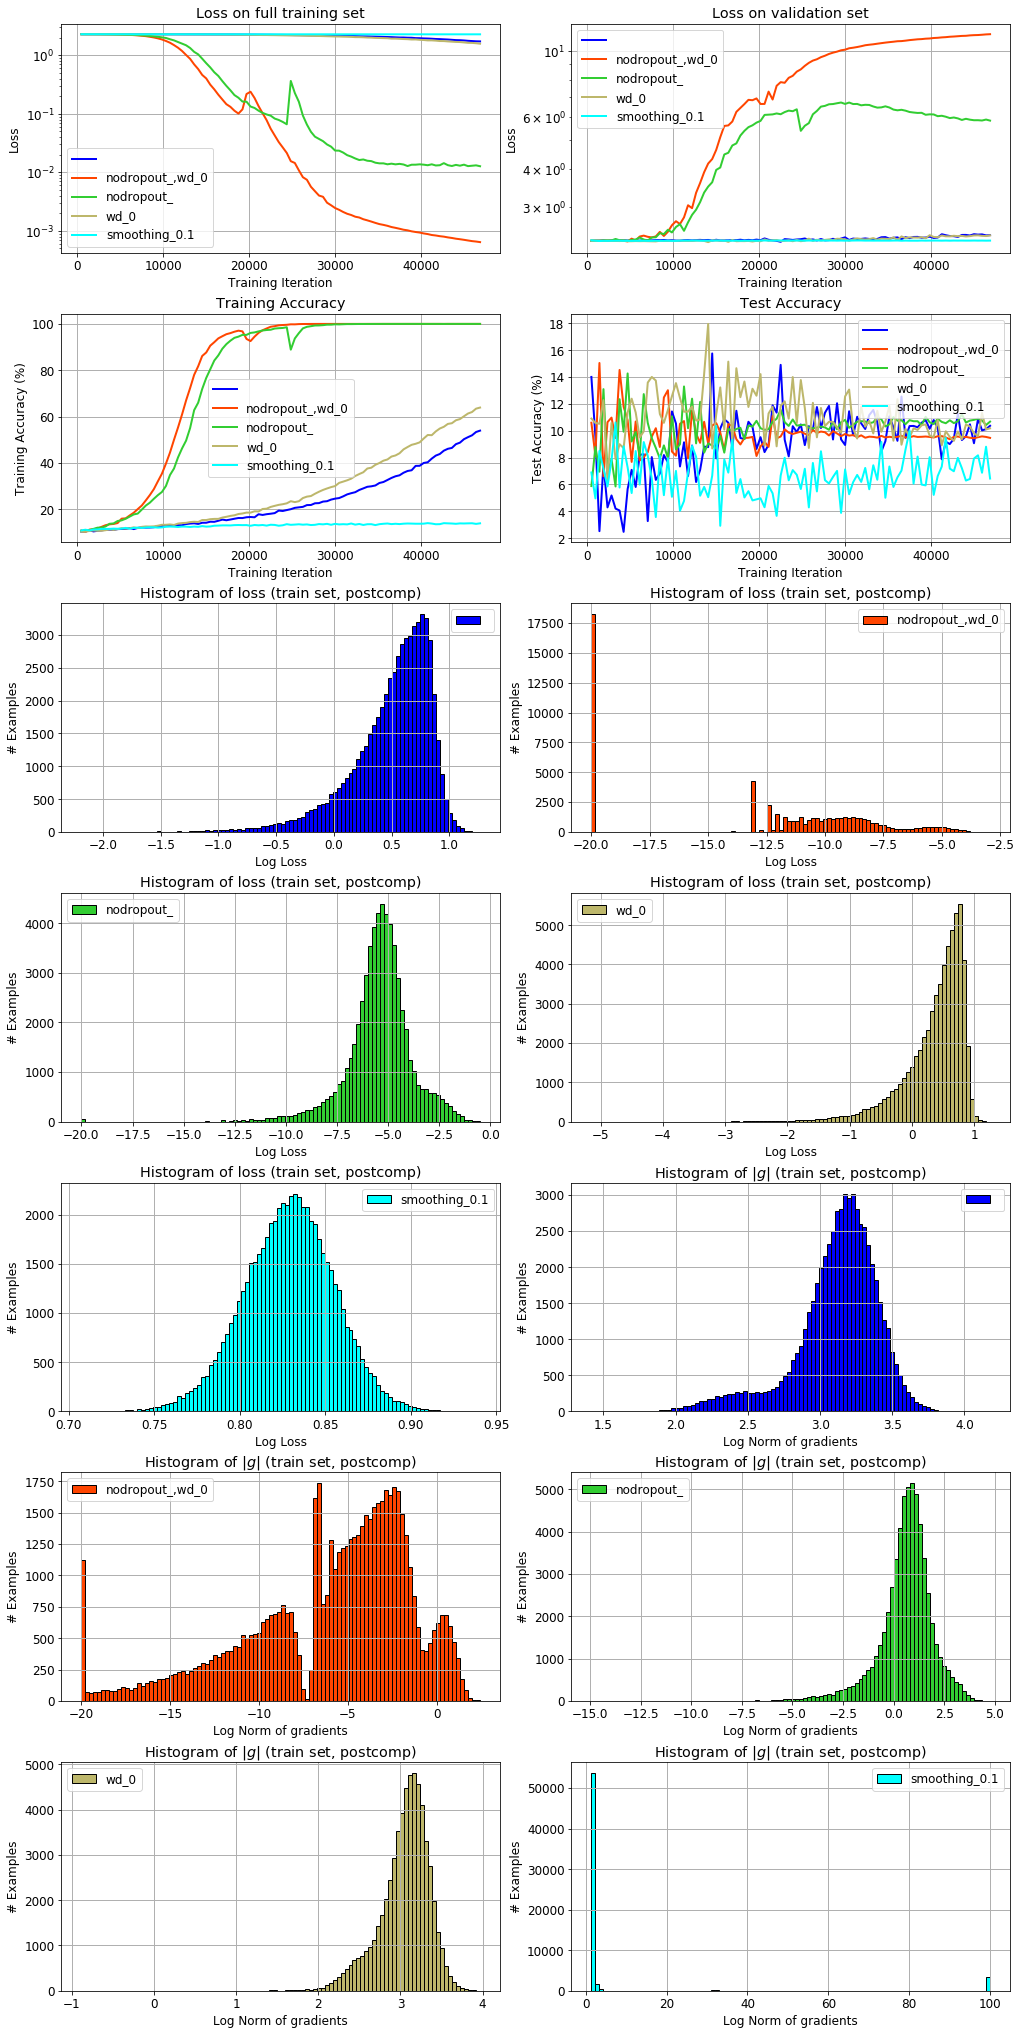

In [175]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_mnist_genbig/.*perc_100']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'Tacc', 'Vacc', 'Tloss_f_log', 'Tnormg_f_log'] # 'Vloss_f', 'Tnormg_f', 'Vnormg_f'] # 'grad_var', 'grad_var_n', 'snoozeC_h']  #  'bumped_p', 'epoch', 'tau', 'alpha_normed_h_log_1', 'alpha_normed_h_log_50', 'alpha_normed_h_log_100'  , 'Tloss_h_log_1', 'Tloss_h_log_50', 'Tloss_h_log_100', 'grad_var', 'grad_var_n']
fig_name = 'figs_gen/mnist_corrupt.png'
lg_tags = ['nodropout', 'wd', 'smoothing']
ylim = [None]*20
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = None
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor)

when do we get zero gradients?

on corrupt data: nodropout, wd=0 but not if wd!=0

on clean data always except for label smoothing

zero loss is correlated with zero gradient

zero is below log=-7

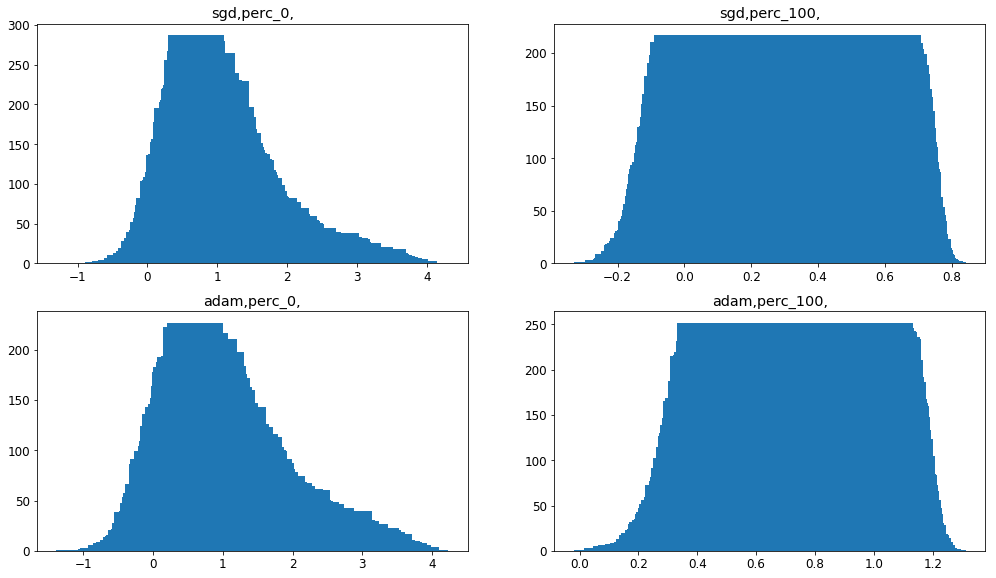

In [144]:
mn = []
mx = []
nz = []
vr = []
mu = []
vr0 = []
mu0 = []
tacc = []
tloss = []
vacc = []
vloss = []
gacc = []
gloss = []
width = 2
height = (len(run_names)+1)//2
fig = plt.figure(figsize=(7*width, 4*height))
fig.subplots()
plt.tight_layout(pad=1., w_pad=3., h_pad=3.0)
for i in range(len(run_names)):
    data=torch.load(run_names[i]+'/log.pth.tar')
    val=data['Tnormg_f']
    val=np.log(np.maximum(np.exp(-20), val))
    mn += [val.min()]
    mx += [val.max()]
    nz += [(val<-19).sum()]
    vr += [val.std()]
    mu += [val.mean()]
    vr0 += [val[val>-20].std()]
    mu0 += [val[val>-20].mean()]
    tacc += [data['Tacc'][-1][-1]]
    vacc += [data['Vacc'][-1][-1]]
    tloss += [data['Tloss'][-1][-1]]
    vloss += [data['Vloss'][-1][-1]]
    gacc += [tacc[-1]-vacc[-1]]
    gloss += [vloss[-1]-tloss[-1]]
    frq, edges = np.histogram(val, bins=1000)
    plt.subplot(height, width, i+1)
    plt.bar(edges[:-1], frq)
    plt.title(get_legend(lg_tags, run_names[i]))

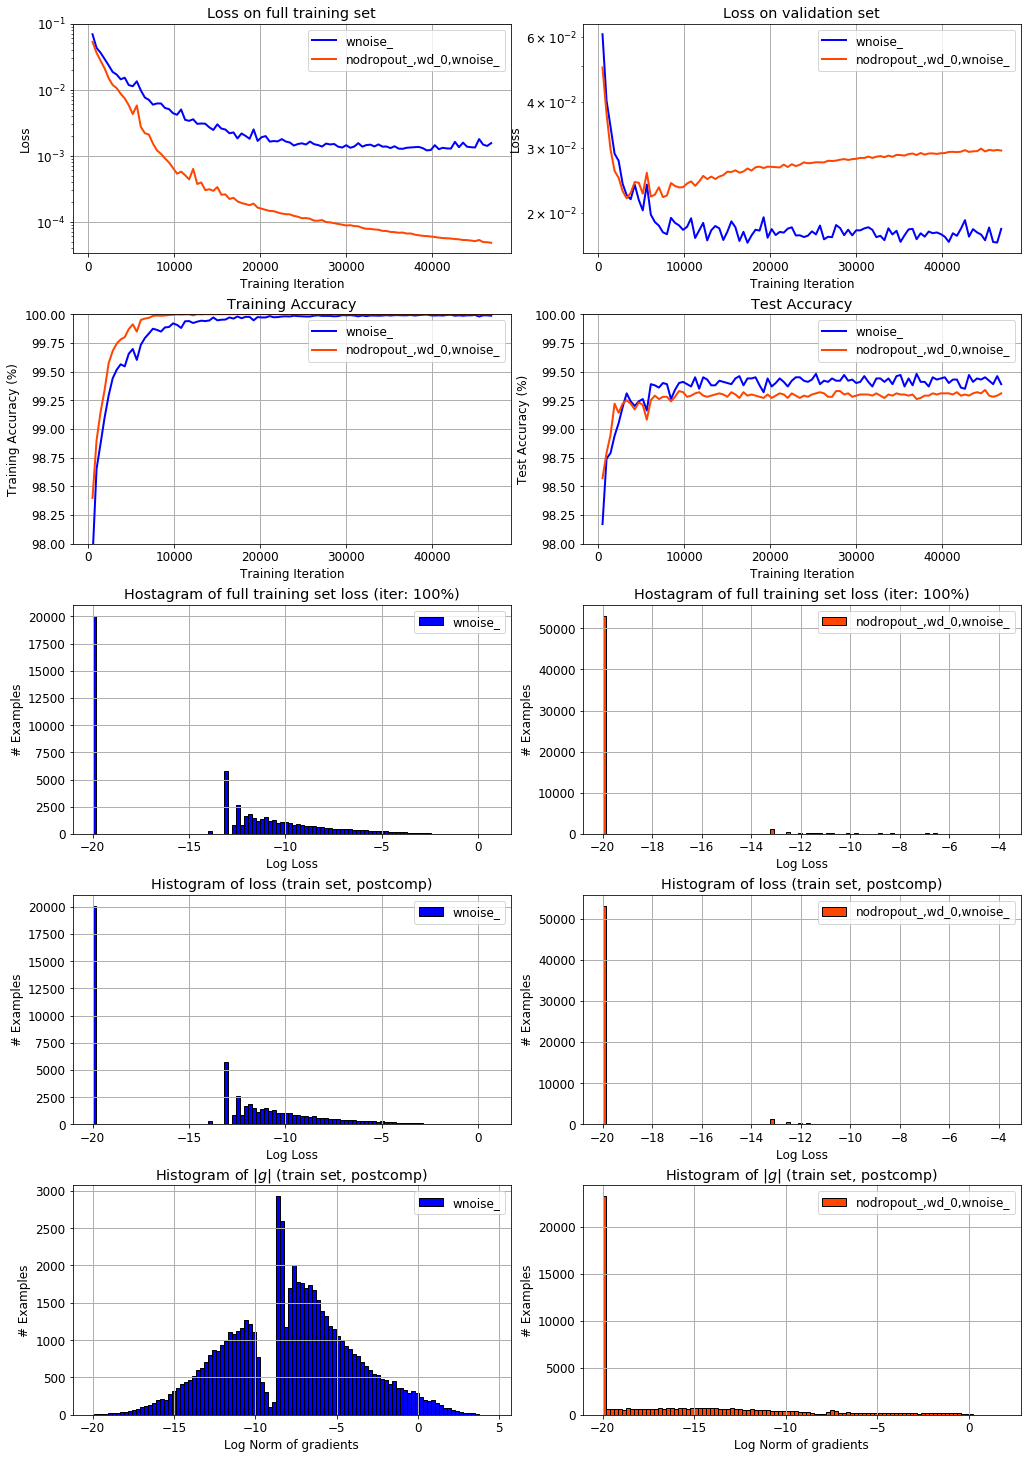

In [183]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_mnist_genbig/.*perc_0.*wnoise']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'Tacc', 'Vacc', 'Tloss_h_log_100', 'Tloss_f_log', 'Tnormg_f_log'] # 'Vloss_f', 'Tnormg_f', 'Vnormg_f'] # 'grad_var', 'grad_var_n', 'snoozeC_h']  #  'bumped_p', 'epoch', 'tau', 'alpha_normed_h_log_1', 'alpha_normed_h_log_50', 'alpha_normed_h_log_100'  , 'Tloss_h_log_1', 'Tloss_h_log_50', 'Tloss_h_log_100', 'grad_var', 'grad_var_n']
fig_name = 'figs_gen/mnist_clean.png'
lg_tags = ['nodropout', 'wd', 'smoothing', 'wnoise']
ylim = [None]*20
ylim[2:4] = [[98, 100], [98, 100]]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = None
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor)

In [202]:
plt.rcParams['font.size']

12.0

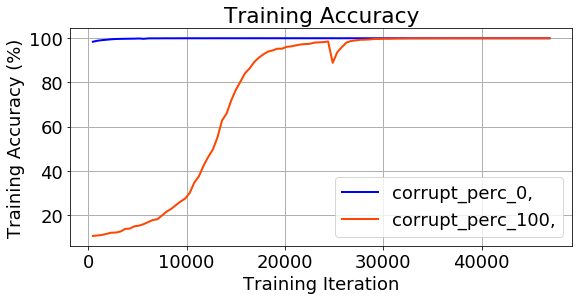

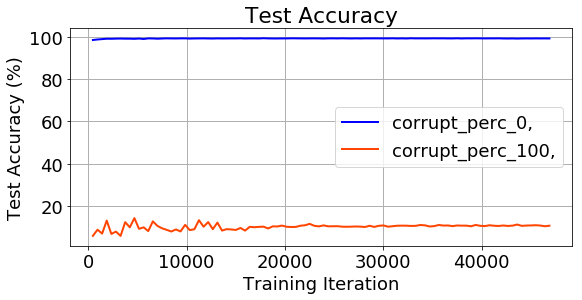

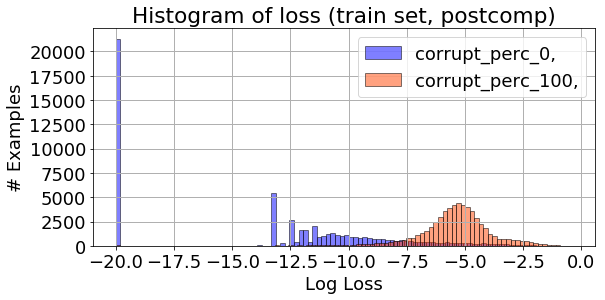

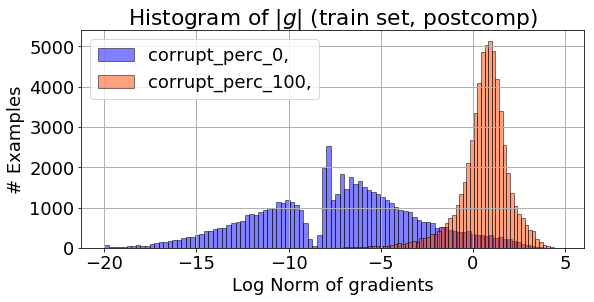

<Figure size 648x288 with 0 Axes>

In [215]:
plt.rcParams.update({'font.size': 18})
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_mnist_genbig/.*nodropout(?!.*wd_0)(?!.*wnoise)']  # (?!.*scheduler)
tag_names = ['Tacc', 'Vacc', 'Tloss_f_log', 'Tnormg_f_log'] # 'Vloss_f', 'Tnormg_f', 'Vnormg_f'] # 'grad_var', 'grad_var_n', 'snoozeC_h']  #  'bumped_p', 'epoch', 'tau', 'alpha_normed_h_log_1', 'alpha_normed_h_log_50', 'alpha_normed_h_log_100'  , 'Tloss_h_log_1', 'Tloss_h_log_50', 'Tloss_h_log_100', 'grad_var', 'grad_var_n']
fig_name = 'figs_gen/mnist_clean_vs_corrupt.png'
lg_tags = ['wd', 'smoothing', 'wnoise', 'corrupt_perc_']
ylim = [None]*20
# ylim[0] = [98, 100]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = False
ncolor = None
save_single = True
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, save_single=save_single)
plt.rcParams.update({'font.size': 12})